#Post Test - Madaline

Madaline (Many Adaptive Linear Neuron) merupakan sebuah arsitektur jaringan saraf tiruan yang tersusun dari sekumpulan Adaline. Berbeda dengan Adaline, Madaline merupakan sebuah jaringan multilayer yang terdiri dari input, hidden, dan output layer.

Pada praktikum sebelumnya, kita sudah menerapkan Madaline dengan fungsi aktivasi bipolar pada pengujiannya. Hal ini dikarenakan sebelumnya kita menggunakan Madaline untuk kasus klasifikasi.

Pada Post Test kali ini, teman-teman akan menerapkan Madaline untuk kasus regresi polinomial orde 2.
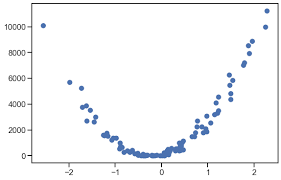



## Kode (jangan diubah)

Fungsi Training Madaline

In [51]:
import numpy as np

def madaline_fit(train_data,train_target,alpha=0.1,max_epoch=-1):
  w = np.random.random((2,2))
  v = np.array([0.5,0.5])
  b = np.random.random(2)
  b = np.append(b,0.5)
  epoch = 0
  aktivasi_linstep = np.vectorize(linstep)
  aktivasi_relu = np.vectorize(relu)
  weight_updated = True

  while weight_updated == True and epoch < max_epoch:
    weight_updated = False

    # Lengkapi kode di bawah ini
    for data,target in zip(train_data,train_target):
      z_in = np.dot(data,w) + b[:-1]
      z = aktivasi_relu(z_in)
      y_in = np.dot(z,v) + b[-1]
      y = y_in
      error = target - y

      if error > 1:
        weight_updated = True
        index = np.where((z_in>0) | (z_in<0))[0]
        b[index] = b[index] + alpha* error
        w[:, index] = w[:, index] + alpha* error *data.reshape(-1,1)

    epoch = epoch +1
  return (w,v,b,epoch)

## Masalah

Diketahui terdapat persamaan kuadrat yang memetakan x ke f(x). Teman-teman diharapkan bisa menerapkan Madaline untuk menyelesaikan permasalahan polinomial berdasarkan data yang diberikan.

Berikut beberapa petunjuk yang bisa diperhatikan.

1.   Buat fungsi aktivasi relu dengan nama relu() dan linstep dengan nama linstep().
2.   Gunakan fungsi Relu untuk hidden layer dan linstep pada output layer.
3.   Nilai output / hasil prediksi tidak harus sama persis dengan hitungan matematikanya, tetapi setidaknya mendekati.
4.   Teman-teman bebas menentukan epoch, learning rate, dan parameter lainnya selama proses training berjalan dan menghasilkan prediksi yang sesuai.



Data

In [52]:
# pada x(fitur), indeks kedua memiliki nilai yang sama seperti indeks pertama
# contoh: f(x,y) = ax^2 + by^2 + cxy + dx + ey + f
# x=y
# f(x,y) = 1x^2 + 2y^2 + 3xy + 4x + 5y + 6
# f(x,y) = 6x^2 + 9x + 6

z = np.array([[-5,-5],[-4.5,-4.5],[-4,-4],[-3.5,-3.5],[-3,-3],[-2.5,-2.5],[-2,-2],
              [-1.5,-1.5],[-1,-1],[-0.5,-0.5],[0,0],[0.5,0.5],[1,1],[1.5,1.5],[2,2],
              [2.5,2.5],[3,3],[3.5,3.5],[4,4],[4.5,4.5],[5,5]])

fx_values = []

for x, y in z:
    fx = 4*(x**2) + 4*(y**2) + 5*x*y + 1*x + 4*y + 8
    fx_values.append(fx)

fx_values = np.array(fx_values)
print(fx_values)

[308.   248.75 196.   149.75 110.    76.75  50.    29.75  16.     8.75
   8.    13.75  26.    44.75  70.   101.75 140.   184.75 236.   293.75
 358.  ]


Jangan ubah kode visualisasi fungsi kuadrat

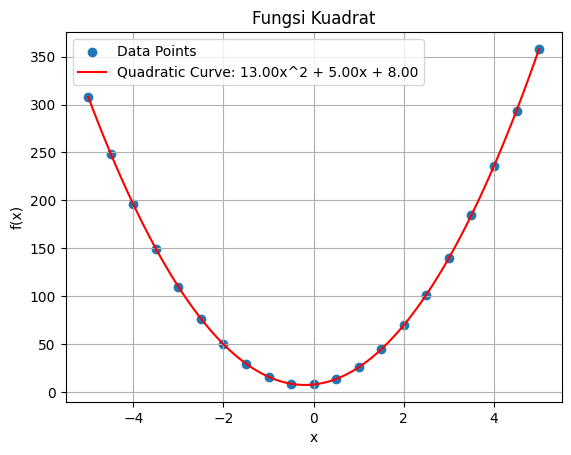

In [53]:
import matplotlib.pyplot as plt

# Fit a quadratic curve to the data
coefficients = np.polyfit(z[:,0], fx_values, 2)
a, b, c = coefficients

# Generate x values for the curve
x_curve = np.linspace(-5, 5, 100)
# Calculate corresponding y values using the quadratic equation
y_curve = a * x_curve**2 + b * x_curve + c

# Plot the data points and the fitted quadratic curve
plt.scatter(z[:,0], fx_values, label='Data Points')
plt.plot(x_curve, y_curve, label=f'Quadratic Curve: {a:.2f}x^2 + {b:.2f}x + {c:.2f}', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fungsi Kuadrat')
plt.legend()
plt.grid(True)
plt.show()

Buat fungsi aktivasi linear bernama linstep()

In [54]:
def linstep(x):
  if x < 0:
    return 0
  else:
    return 1

Buat fungsi aktivasi relu bernama relu()

In [55]:
def relu(x):
  return max(0,x)

Buat fungsi pengujian bernama madaline_predict()

In [56]:
def madaline_predict(w, v, b, test_data):
    predictions = []
    for data in test_data:
        z_in = np.dot(w, data) + b[:2]
        z = np.array([relu(z_in[0]), relu(z_in[1])])
        y_in = np.dot(v, z) + b[2]
        y = linstep(y_in)
        predictions.append(y)
    return np.array(predictions)

def madaline_fit(train_data, train_target, alpha, max_epoch):
    n_input = train_data.shape[1]
    n_hidden = 2
    n_output = 1

    w = np.random.rand(n_hidden, n_input)
    v = np.random.rand(n_output, n_hidden)
    b = np.random.rand(n_hidden + n_output)

    epoch = 0
    while epoch < max_epoch:
        error_total = 0
        for data, target in zip(train_data, train_target):
            z_in = np.dot(w, data) + b[:n_hidden]  # Calculate z_in
            z = np.array([relu(z) for z in z_in])  # Apply relu to each element of z_in
            y_in = np.dot(v, z) + b[n_hidden:]  # Calculate y_in
            y = linstep(y_in)  # Apply linstep

            error = target - y
            error_total += abs(error)

            if error != 0:
                if y == 0:
                    # Find z with the largest absolute value
                    idx_max = np.argmax(np.abs(z_in))
                    w[idx_max] += alpha * data * error
                    b[idx_max] += alpha * error
                else:
                    v += alpha * z * error
                    b[n_hidden:] += alpha * error

        epoch += 1
        if error_total == 0:
            break

    return (w, v, b, epoch)

Uji dengan x_test

In [57]:
# Isi parameter max_epoch dan alpha dan analisis hasilnya oleh praktikan

x_test = z

(w,v,b,epoch) = madaline_fit(z, fx_values, alpha=0.1, max_epoch=100)
output = madaline_predict(w,v,b,x_test) # Pass x_test as test_data

print('\nOutput:', output)
print('Epoch:', epoch)


Output: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Epoch: 100


Jangan ubah kode visualisasi hasil regresi

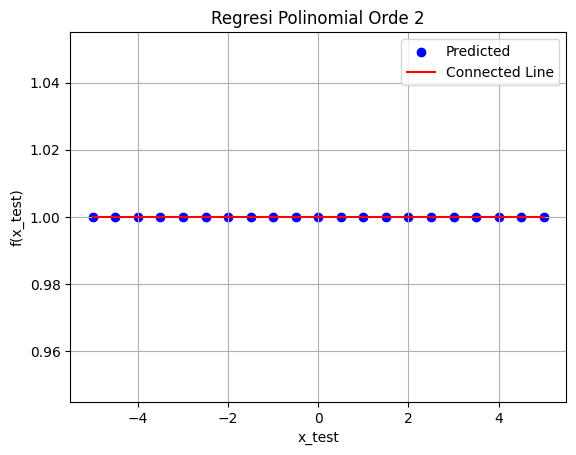

In [58]:
# Extract the first feature from x_test
x_test_first_feature = x_test[:, 0]

# Sort the points based on the first feature
sorted_indices = np.argsort(x_test_first_feature)
sorted_x_test_first_feature = x_test_first_feature[sorted_indices]
sorted_output = output[sorted_indices]

# Create a scatter plot
plt.scatter(x_test_first_feature, output, label='Predicted', color='blue')

# Plot a line connecting the sorted points
plt.plot(sorted_x_test_first_feature, sorted_output, color='red', label='Connected Line')

plt.xlabel('x_test')
plt.ylabel('f(x_test)')
plt.title('Regresi Polinomial Orde 2')
plt.legend()
plt.grid(True)
plt.show()

Jangan ubah kode visualisasi perbandingan nilai true dengan hasil prediksi

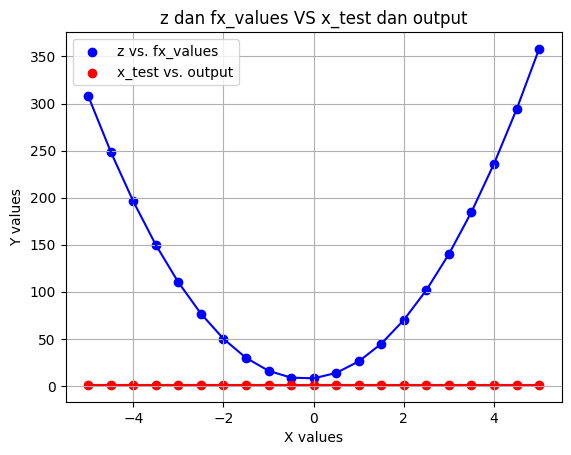

In [59]:
import matplotlib.pyplot as plt

# Assuming z, fx_values, x_test, and output are defined as mentioned in your question

# Create a scatter plot for z vs. fx_values
plt.scatter(z[:, 0], fx_values, label='z vs. fx_values', color='blue')

# Create a scatter plot for x_test vs. output
plt.scatter(x_test[:, 0], output, label='x_test vs. output', color='red')

# Plot lines connecting the dots for z vs. fx_values
plt.plot(z[:, 0], fx_values, linestyle='-', color='blue')

# Plot lines connecting the dots for x_test vs. output
plt.plot(x_test[:, 0], output, linestyle='-', color='red')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('z dan fx_values VS x_test dan output')
plt.legend()
plt.grid(True)
plt.show()

## Analisis Hasil

1. Dari data dan hasil pengujian regresi, jabarkan fungsi kuadrat yang sesuai!

2. Bagaimana teman-teman melakukan tuning JST Madaline hingga bisa melakukan regresi polinomial orde 2?

1.
Setelah dilakukan pengujian regresi dengan menggunakan data z dan target output fx_values, kita dapat melakukan fitting kuadrat menggunakan metode polynomial regression untuk menemukan fungsi kuadrat yang sesuai dengan data.

2. Melakukan tuning JST Madaline agar bisa melakukan regresi polinomial orde 2 memerlukan beberapa langkah pengoptimalan pada parameter pelatihan dan arsitektur jaringan. Melakukan tuning JST Madaline untuk regresi polinomial orde 2 melibatkan penyesuaian arsitektur jaringan (jumlah neuron di hidden layer), nilai learning rate, jumlah epoch, dan penggunaan fungsi aktivasi yang tepat. Normalisasi data, cross-validation, dan early stopping juga penting untuk memastikan pelatihan yang stabil dan menghindari overfitting.